In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
def gather_files(experiment):
    allFiles = glob.glob("*"+experiment+"*")
    print(allFiles)
    frame = pd.DataFrame()
    DataFrameList = []
    for current_file in allFiles:
        df = pd.read_csv(current_file,usecols=["Generation","Max Fitness","Average Fitness","World","Level"])
        DataFrameList.append(df)
    frame = pd.concat(DataFrameList)  
    return frame

In [3]:
blind=gather_files("blind")
eye=gather_files("eye")
dqn=gather_files("dqn")
killswitch=gather_files("dqks")

['13blind.csv', '19blind.csv', '20blind.csv', '21blind.csv', '23blind.csv', '25blind.csv', '5blind.csv', '6blind.csv']
['15eye.csv', '17eye.csv', '18eye.csv', '22eye.csv', '24eye.csv', '4eye.csv', '9eye.csv']
['1dqn.csv']
['1dqks.csv']


In [19]:
def find_average(exp):
    fit_list=[]
    Max=exp["Generation"].max()
    if Max>80:
        Max=80
    for i in range(Max):
        cf=exp[exp["Generation"]==(i+1)]
        cf["total"]=cf["Average Fitness"]
        #cf["total"]=cf["World"]*2000000+cf["Level"]*3000+cf["Max Fitness"]
        fit_list.append(cf["total"].mean())

    return np.array(fit_list)

In [20]:
eye_list=find_average(eye)
blind_list=find_average(blind)
dqn_list=find_average(dqn)
ks_list=find_average(killswitch)

C:\Users\Jonny\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


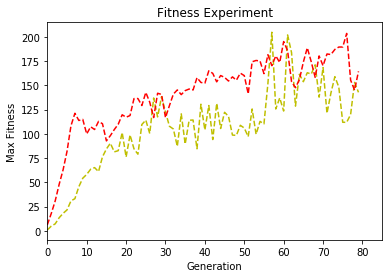

In [25]:
#plt.plot(eye_list
#plt.plot(eye_list,'r--',blind_list,'b--',dqn_list,'g--',ks_list,'y--')
plt.plot(ks_list,'y--',eye_list,'r--')
axes = plt.gca()
axes.set_xlim([0,85])
plt.ylabel('Max Fitness')
plt.xlabel('Generation')
plt.title("Fitness Experiment")
plt.show()